## **Estimación de diabetes**

En este notebook se realiza el análisis de datos de salud de mujeres de ascendencia indígena Pima que viven cerca de Phoenix, Arizona, EE.UU, con el objetivo de predecir si el paciente tiene diabetes o no, basandose en los datos médicos incluidos en el dataset.

Dataset disponible en: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

### **1. Importación de librerias y de los datos**

In [588]:
# importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# herramientas
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
# escalamiento y normalizacion
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
# imputers
from sklearn.impute import SimpleImputer
# metricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
# mejoras
from sklearn.model_selection import GridSearchCV

In [589]:
# datos y conversion a dataframe
df = pd.read_csv('diabetes.csv')
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### **2. Exploración y limpieza de los datos**

En esta sección se realiza un análisis exploratorio del set de datos con el objetivo de comprenderlos. En el análisis se busca identificar datos faltantes, duplicados, outliers, inconsistencia en datos categóricos y se de ser necesario se aplican técnica de imputación para los datos faltantes y outliers.

In [590]:
# df
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [591]:
# tipo de datos
print("Tipos de datos del dataframe")
df.dtypes

Tipos de datos del dataframe


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Los datos disponibles en el dataset son del tipo numérico. Las columnas del tipo "float" son: BMI y DiabetesPedigreeFunction; mientras que las restantes tienen datos del tipo "int". Por otro lado, la columna "outcome" representa la presencia (1) o ausencia (0) de diabetes mediante un comportamiento binario. Además, los tipos de datos fueron reconocidos de manera correcta.

In [592]:
# info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [593]:
# df
df.shape

(768, 9)

El dataset contiene 768 filas y 9 columnas de datos.

In [594]:
# estadisticas
print("Estadistica descriptiva del dataset")
df.describe()

Estadistica descriptiva del dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [595]:
# duplicados
df.duplicated().sum()

0

El dataset no cuenta con valores duplicados.

A continuación se busca identificar datos faltantes en el dataframe.

In [596]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)

# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)

# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)

# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)

# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Pregnancies,768,0,0.0
Glucose,768,0,0.0
BloodPressure,768,0,0.0
SkinThickness,768,0,0.0
Insulin,768,0,0.0
BMI,768,0,0.0
DiabetesPedigreeFunction,768,0,0.0
Age,768,0,0.0
Outcome,768,0,0.0


Se observa que el dataset no contiene datos faltantes.

Se procede a visualizar la distribución de los datos.

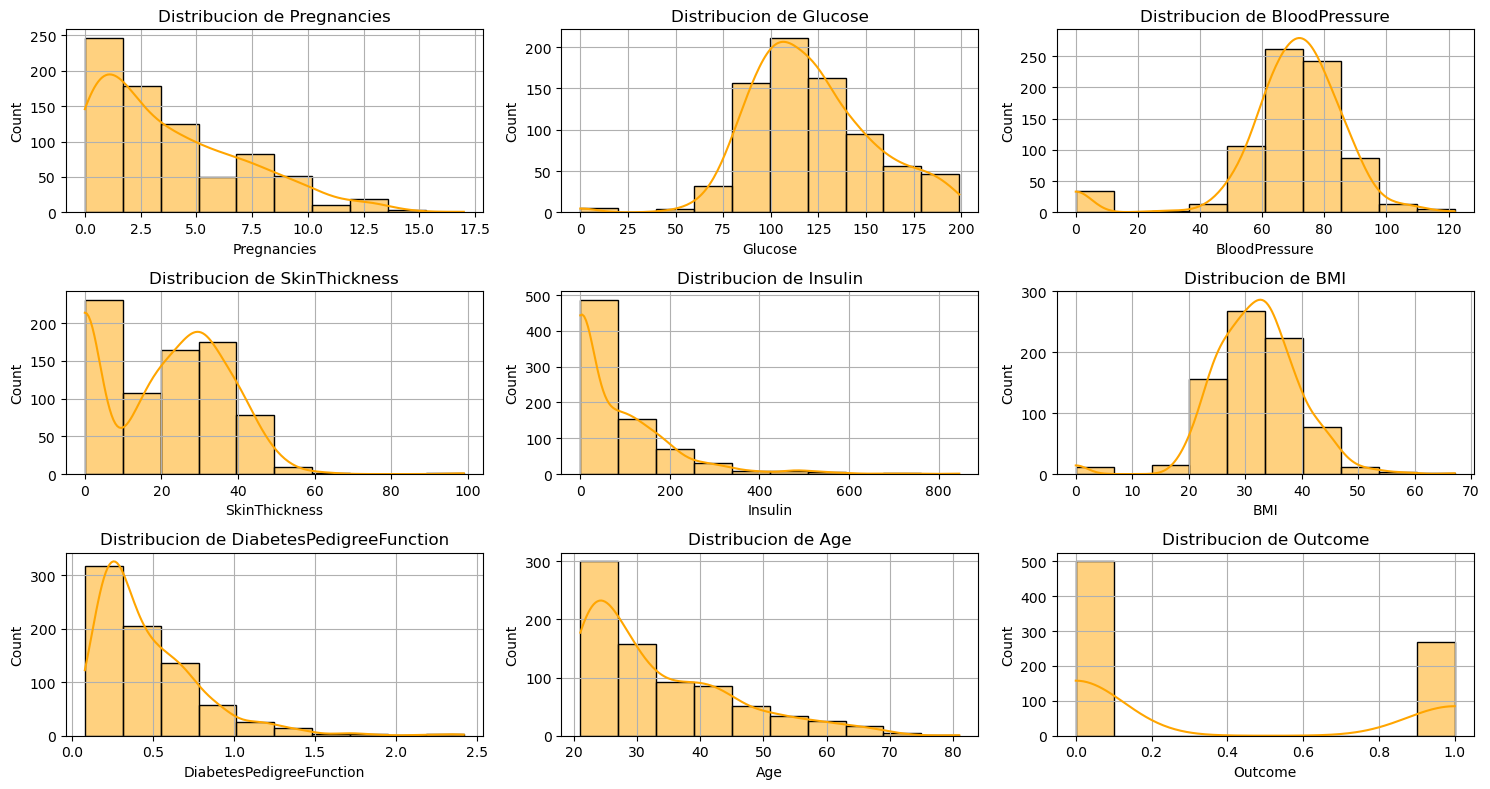

In [597]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 3
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# distribucion de los datos
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.histplot(df[col], kde=True, color="orange", bins=10)  
    plt.title(f"Distribucion de {col}")
    plt.tight_layout()
    plt.grid()

plt.show()

En el gráfico se observan las distribuciones de los datos. El primer grafico (Distribución de pregnancies) hace referencia a la cantidad de veces que la paciente estuvo embarazada y se logra identificar que la mayor cantidad de datos se ajusta a los valores menores. En los gráficos de Glucose y BloodPressure se observa que los datos tienden a ajustarse a una distribución normal, sin embargo es evidente la presencia de outliers ya que hay valores de 0 que son imposibles para estos datos. En cuanto a la SkinThickness, es una variable que hace referencia al grosor de la piel y está medida en mm, nuevamente los datos se acomodan a los valores menores, sugiriendo que la mayoria de las pacientes tienen la piel fina, sin embargo es evidente la presencia de outliers ya que hay una gran cantidad de datos en 0. Para la distribución de datos de insulina se observa nuevamente la presencia de outliers con valores de 0, valor imposble para este tipo de dato. BMI muestra una distribución normal de los datos. La variable denominada "DiabetesPedigreeFunction" es una función que puntúa la probabilidad de diabetes basándose en antecedentes familiares, con un rango realista de 0,08 a 2,42, y en la distribución de estos datos se observa que la mayoria se encuentra cercano a los valores menores, por lo menos menores a 1. Por último, la distribución de edades sugiere que la mayoría de las pacientes se ecnuentran en un rango de 20 a 40 años, con más pacientes entre 20 y 30 años. 

A continuación, se procede a visualizar outliers en los datos.

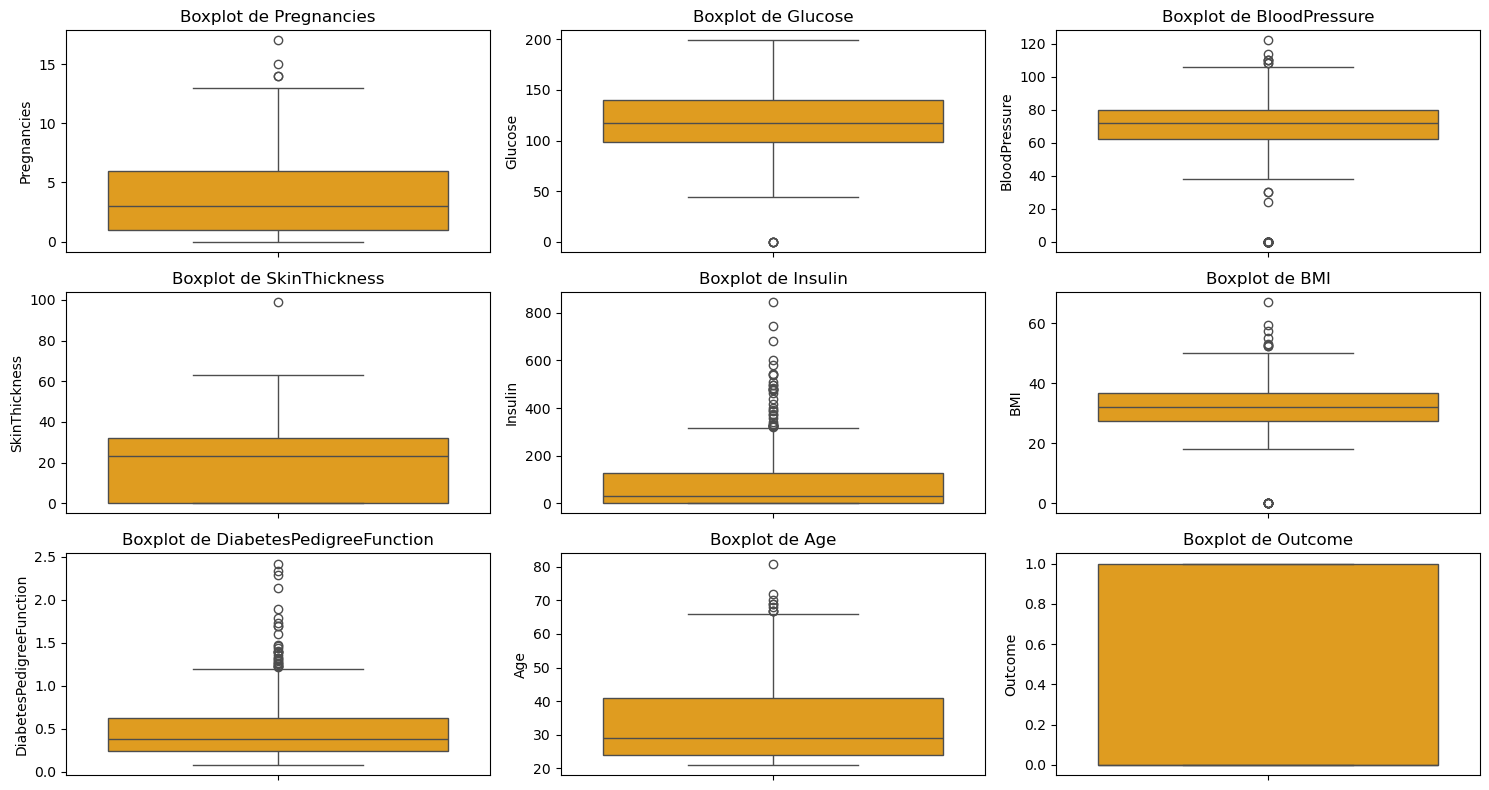

In [598]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 3
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# crear boxplots 
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.boxplot(y=df[col], color="orange")
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

En los boxplots se logra visualizar que en el set de datos hay outliers o valores fuera de rango. Dadas las condiciones, se procede a analizar la procedencia de los outliers.

In [599]:
# pregnancies
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

Los valores de la variable "pregnancies" son valores discretos, pues cuenta la cantidad de veces que una paciente estuvo embarazada. 

In [600]:
# estadisticas de pregnancies 
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

Con el objetivo de ir analizando los outliers de las variables se define la funcion identificar_ouliers.

In [601]:
# funcion para identificar outliers
def identificar_outliers(df, columna):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # filtrar 
    outliers = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]
    
    return {
        'outliers': outliers,
        'limites': {'inferior': lower_bound, 'superior': upper_bound}}

Se procede a analizar la variable Pregnancies: número de veces que la paciente estuvo embarazada.

In [602]:
# idenficar outliers de pregnancies
identificar_outliers(df,'Pregnancies')

{'outliers':      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 88            15      136             70             32      110  37.1   
 159           17      163             72             41      114  40.9   
 298           14      100             78             25      184  36.6   
 455           14      175             62             30        0  33.6   
 
      DiabetesPedigreeFunction  Age  Outcome  
 88                      0.153   43        1  
 159                     0.817   47        1  
 298                     0.412   46        1  
 455                     0.212   38        1  ,
 'limites': {'inferior': -6.5, 'superior': 13.5}}

El numero de embarazos que estan fuera de rango son 4, indicando que las pacientes tuvieron mas de 14 embarazos. Si bien es un valor elavado y poco realista, pueden ser reales considerando el contexto de las pacientes. Dadas las condiciones se mantienen de esta forma.

Se procede a analizar la variable BloodPressure: presión arterial diastólica (mm Hg)

In [603]:
# blood pressure
df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [604]:
# idenficar outliers de pregnancies
identificar_outliers(df,'BloodPressure')

{'outliers':      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 7             10      115              0              0        0  35.3   
 15             7      100              0              0        0  30.0   
 18             1      103             30             38       83  43.3   
 43             9      171            110             24      240  45.4   
 49             7      105              0              0        0   0.0   
 60             2       84              0              0        0   0.0   
 78             0      131              0              0        0  43.2   
 81             2       74              0              0        0   0.0   
 84             5      137            108              0        0  48.8   
 106            1       96            122              0        0  22.4   
 125            1       88             30             42       99  55.0   
 172            2       87              0             23        0  28.9   
 177         

Se visualiza que hay valores de presión sanguinea igual a 0, lo cual es imposible.

In [605]:
# presion igual a 0
df[df['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


Se evidencia que los datos de presión sanguinea = 0 son un error. A continuación se verifica la distribución de los datos para poder elegir una técnica de corrección. 

In [606]:
# funcion que hace histogramas para distribuciones
def graficar_histograma(df, columna):
    plt.figure(figsize=(10, 6))

    # histograma
    sns.histplot(df[columna], bins=20, kde=True, color="orange", edgecolor='black')

    # grafico
    plt.title(f'Distribución de {columna}', fontsize=16)
    plt.xlabel(f'Valores de {columna}', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid()

    # mostrar
    plt.show()

In [607]:
# funcion que hace boxplots
def graficar_boxplot(df, columna):
    plt.figure(figsize=(10, 6))

    # histograma
    sns.boxplot(df[columna], color="orange")

    # grafico
    plt.title(f'Boxplot de {columna}', fontsize=16)

    # mostrar
    plt.show()

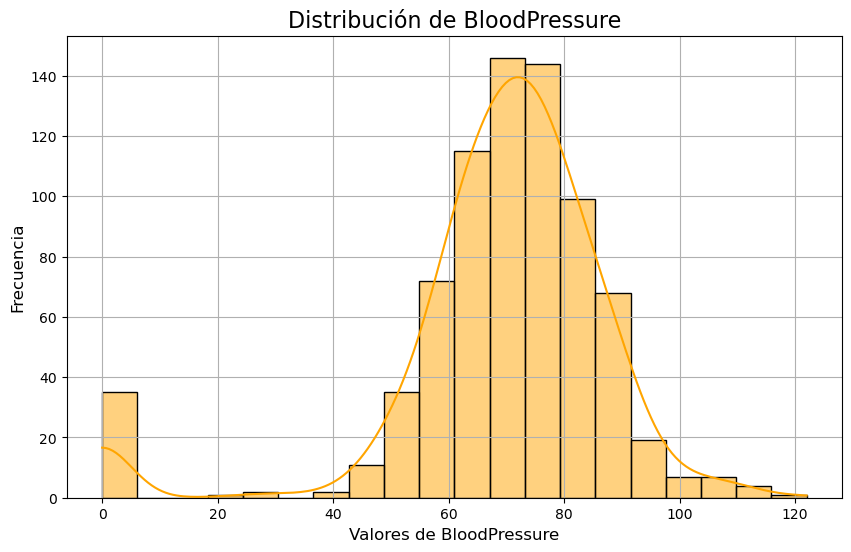

In [608]:
# graficar distribucion
graficar_histograma(df,"BloodPressure")

In [609]:
# df
df['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

Como los datos de presión arterial tienden a tener una distribución normal, los datos erroneos de presion arterial = 0 serán reemplazados por la media.

In [610]:
# reemplazar datos
mean_bp = df[df['BloodPressure'] > 0]['BloodPressure'].mean()

# reemplazar
df['BloodPressure'] = df['BloodPressure'].replace(0, mean_bp)

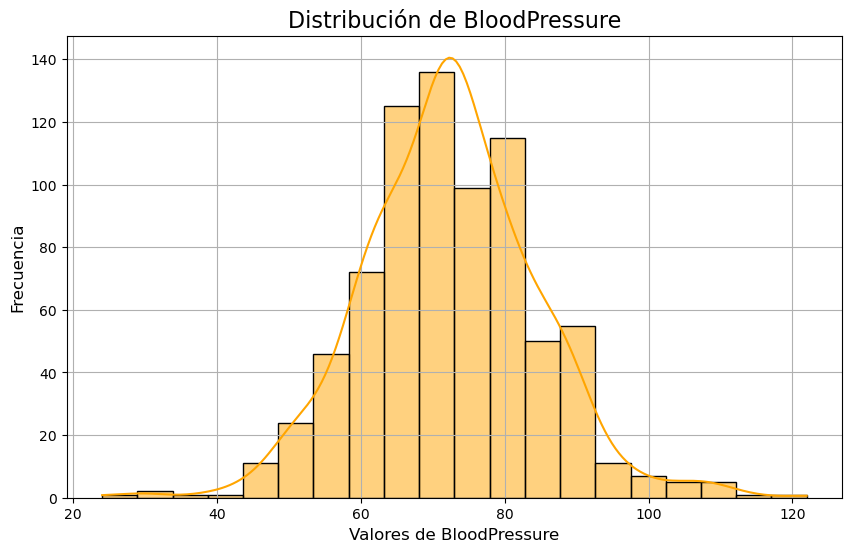

In [611]:
# distribucion
graficar_histograma(df,"BloodPressure")

In [612]:
# presion igual a 0
df[df['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Una vez rellenados los datos de 0 con la media, se observa que los datos de presión arterial se encuentran ajustados.

Se procede a analizar la variable Glucose: concentración de glucosa plasmática a las 2 horas en una prueba de tolerancia oral a la glucosa

In [613]:
# glucose
df['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [614]:
# glucosa igual a 0
df[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48.0,20,0,24.7,0.140,22,0
182,1,0,74.0,20,23,27.7,0.299,21,0
342,1,0,68.0,35,0,32.0,0.389,22,0
349,5,0,80.0,32,0,41.0,0.346,37,1
502,6,0,68.0,41,0,39.0,0.727,41,1


Análogamente al caso de presión arterial, la glucosa no puede ser = 0 y sin embargo se encuentran estos valores en el dataframe. Una vez identificada su distribución, procede a rellenar estos datos con la media.

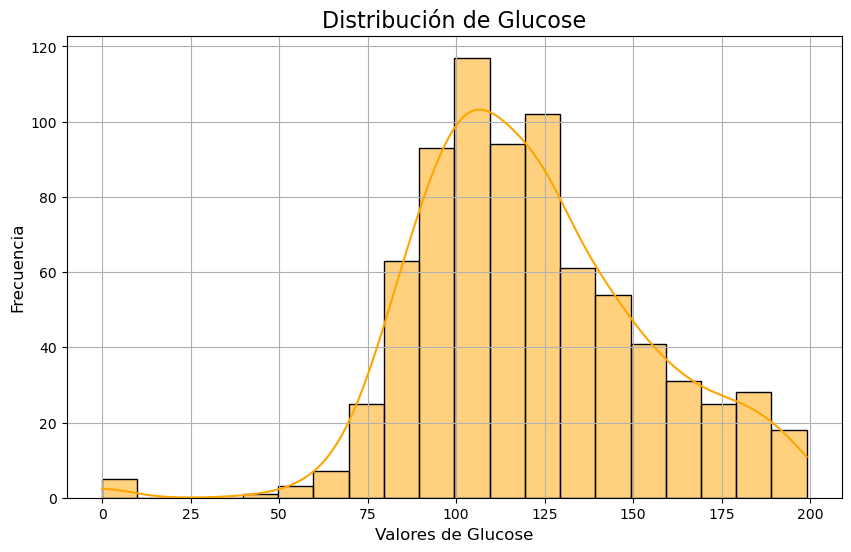

In [615]:
# dist
graficar_histograma(df,"Glucose")

In [616]:
# df
df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

Los datos de glucosa tambien muestran una distribución normal y por tanto se reemplazan los datos iguales a 0 con la media.

In [617]:
# reemplazar datos
mean_glucose = df[df['Glucose'] > 0]['Glucose'].mean()

# reemplazar
df['Glucose'] = df['Glucose'].replace(0, mean_glucose)

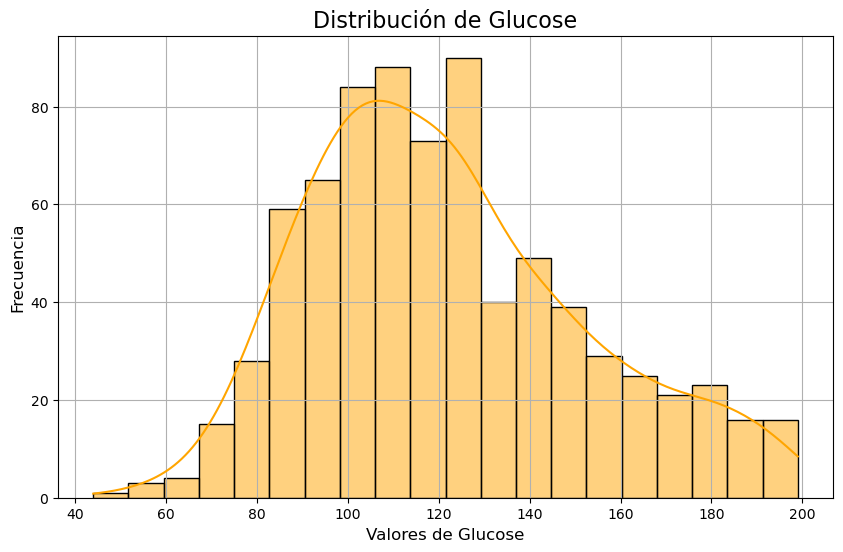

In [618]:
# dist
graficar_histograma(df,"Glucose")

In [619]:
# nulos
df[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Los datos de la columna "Glucose" quedaron ajustados.

Se procede a analizar la variable SkinThickness: grosor del pliegue cutáneo del tríceps (mm)

In [620]:
# skin thickness
df['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [621]:
# outliers
identificar_outliers(df,'SkinThickness')

{'outliers':      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 579            2    197.0           70.0             99        0  34.7   
 
      DiabetesPedigreeFunction  Age  Outcome  
 579                     0.575   62        1  ,
 'limites': {'inferior': -48.0, 'superior': 80.0}}

In [622]:
# nulos
df[df['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64.000000,0,0,23.3,0.672,32,1
5,5,116.0,74.000000,0,0,25.6,0.201,30,0
7,10,115.0,72.405184,0,0,35.3,0.134,29,0
9,8,125.0,96.000000,0,0,0.0,0.232,54,1
10,4,110.0,92.000000,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123.0,72.000000,0,0,36.3,0.258,52,1
758,1,106.0,76.000000,0,0,37.5,0.197,26,0
759,6,190.0,92.000000,0,0,35.5,0.278,66,1
762,9,89.0,62.000000,0,0,22.5,0.142,33,0


Nuevamente se presenta el caso en el que un dato no debe ser 0, en este caso es el grosor de la piel del paciente. Entonces se procede de manera similar a los casos anteriores.

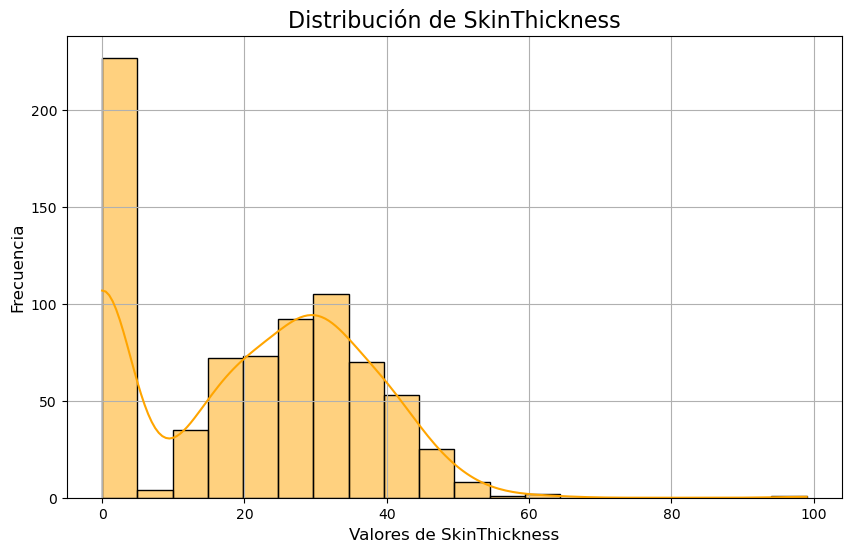

In [623]:
# hist
graficar_histograma(df,"SkinThickness")

In [624]:
# describe
df['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [625]:
# reemplazar datos
mean_skin = df[df['SkinThickness'] > 0]['SkinThickness'].mean()

# reemplazar
df['SkinThickness'] = df['SkinThickness'].replace(0, mean_skin)

In [626]:
# valores nulos
df[df['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [627]:
# df
df['SkinThickness'].describe()

count    768.000000
mean      29.153420
std        8.790942
min        7.000000
25%       25.000000
50%       29.153420
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

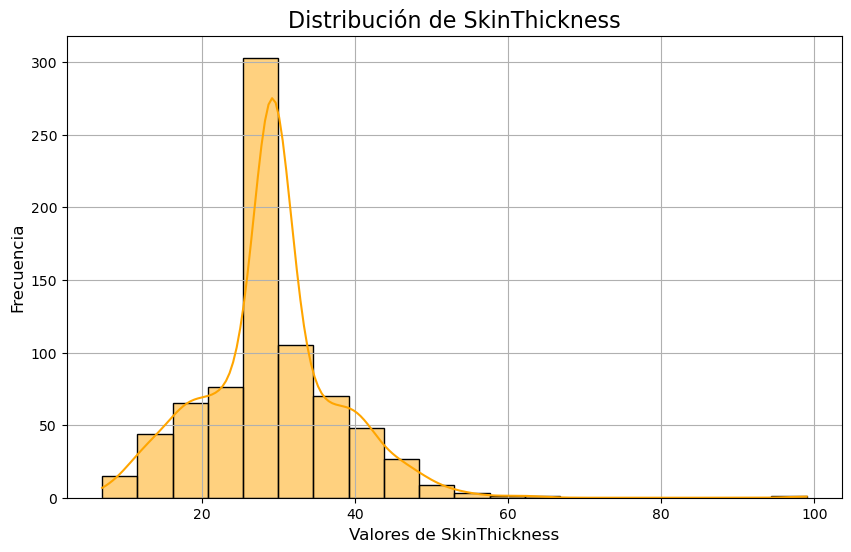

In [628]:
# dist
graficar_histograma(df,"SkinThickness")

Una vez eliminado los datos de SkinThickness igual a 0, los datos quedan ajustados. No obstante, se analiza nuevamente los datos restantes en busqueda de mas outliers.

In [629]:
# outliers
identificar_outliers(df,"SkinThickness")

{'outliers':      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 8              2    197.0           70.0           45.0      543  30.5   
 16             0    118.0           84.0           47.0      230  45.8   
 32             3     88.0           58.0           11.0       54  24.8   
 39             4    111.0           72.0           47.0      207  37.1   
 50             1    103.0           80.0           11.0       82  19.4   
 ..           ...      ...            ...            ...      ...   ...   
 698            4    127.0           88.0           11.0      155  34.5   
 710            3    158.0           64.0           13.0      387  31.2   
 718            1    108.0           60.0           46.0      178  35.5   
 753            0    181.0           88.0           44.0      510  43.3   
 763           10    101.0           76.0           48.0      180  32.9   
 
      DiabetesPedigreeFunction  Age  Outcome  
 8                       0.158   53    

In [631]:
# maximo de skin
df['SkinThickness'].max()

99.0

In [632]:
# minimo de skin
df['SkinThickness'].min()

7.0

In [633]:
# uniqe
df['SkinThickness'].unique()

array([35.        , 29.        , 29.15341959, 23.        , 32.        ,
       45.        , 19.        , 47.        , 38.        , 30.        ,
       41.        , 33.        , 26.        , 15.        , 36.        ,
       11.        , 31.        , 37.        , 42.        , 25.        ,
       18.        , 24.        , 39.        , 27.        , 21.        ,
       34.        , 10.        , 60.        , 13.        , 20.        ,
       22.        , 28.        , 54.        , 40.        , 51.        ,
       56.        , 14.        , 17.        , 50.        , 44.        ,
       12.        , 46.        , 16.        ,  7.        , 52.        ,
       43.        , 48.        ,  8.        , 49.        , 63.        ,
       99.        ])

Se observa que el rango de grosor de piel va de 7 mm a 99 mm. En particular los valores 7, 8 y 9, son muy valores muy bajos y el 99 es demasiado elevado.

In [634]:
# skin superior a 90
df[df['SkinThickness'] > 90]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197.0,70.0,99.0,0,34.7,0.575,62,1


Dado que el valor bastante extraordinario, se decide reemplazarlo por la media.

In [635]:
# media
mean_skin_thickness = df[df['SkinThickness'] <= 90]['SkinThickness'].mean()

# reemplazar
df.loc[df['SkinThickness'] > 90, 'SkinThickness'] = mean_skin_thickness

In [636]:
# skin superior a 90
df[df['SkinThickness'] > 90]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Por ultimo, se analiza la naturaleza de los valores mas bajos de grosor.

In [637]:
# skin menor a 10
df[df['SkinThickness'] < 10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
254,12,92.0,62.0,7.0,258,27.6,0.926,44,1
382,1,109.0,60.0,8.0,182,25.4,0.947,21,0
434,1,90.0,68.0,8.0,0,24.5,1.138,36,0
519,6,129.0,90.0,7.0,326,19.6,0.582,60,0


De la misma forma, se trata de un grosor de piel muy fino inclusive para la edad de estas personas y por tal motivo se decide reemplazarlo por la media.

In [638]:
# media
mean_skin_thickness = df[df['SkinThickness'] >= 10]['SkinThickness'].mean()

# reemplazar
df.loc[df['SkinThickness'] < 10, 'SkinThickness'] = mean_skin_thickness

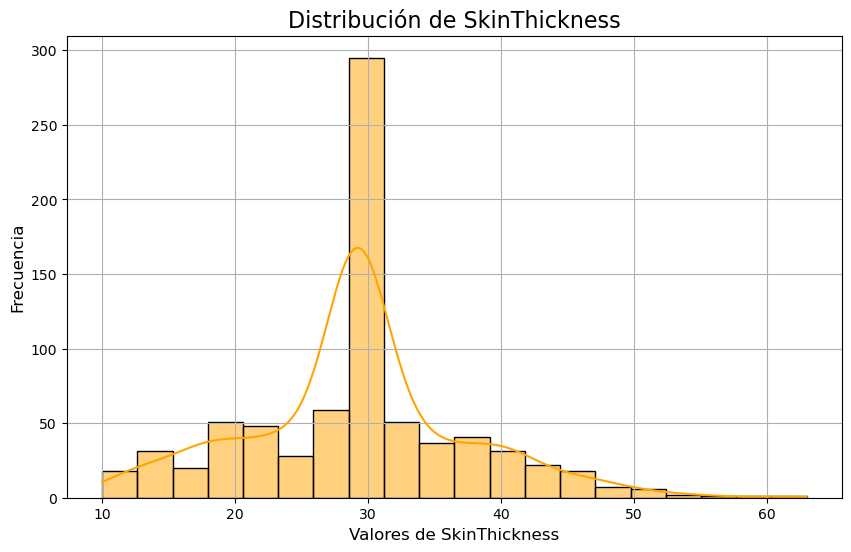

In [639]:
# dist
graficar_histograma(df,"SkinThickness")

Se procede a analizar la variable Insuline: insulina de 2 horas (mu U/ml)

In [640]:
# insuline
df['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [641]:
# valores nulos
df[df['Insulin'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,0,33.6,0.627,50,1
1,1,85.0,66.000000,29.00000,0,26.6,0.351,31,0
2,8,183.0,64.000000,29.15342,0,23.3,0.672,32,1
5,5,116.0,74.000000,29.15342,0,25.6,0.201,30,0
7,10,115.0,72.405184,29.15342,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.000000,31.00000,0,44.0,0.403,43,1
762,9,89.0,62.000000,29.15342,0,22.5,0.142,33,0
764,2,122.0,70.000000,27.00000,0,36.8,0.340,27,0
766,1,126.0,60.000000,29.15342,0,30.1,0.349,47,1


Valores de cero en insulina, nuevamente esta variable no puede ser cero y por tanto se verifica su distribución para elegir un método de reemplazo.

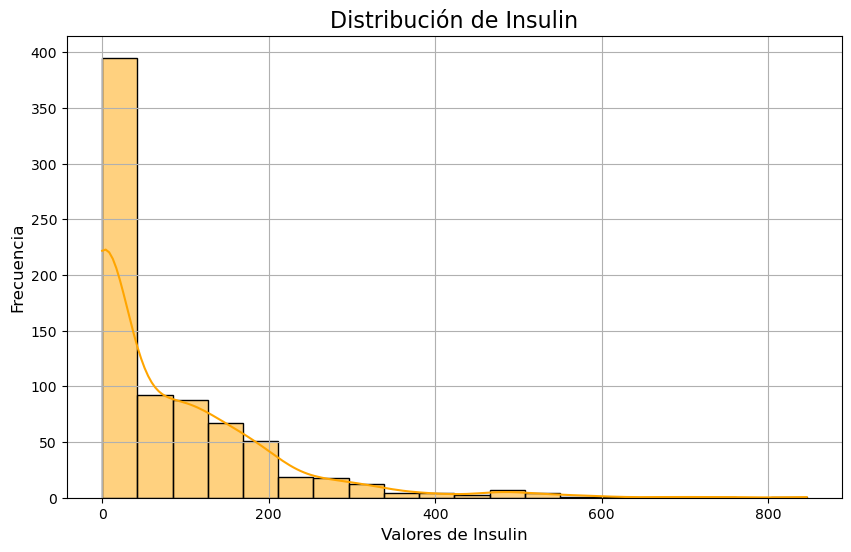

In [642]:
# dist
graficar_histograma(df,"Insulin")

In [643]:
# describe
df['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

Para reemplazar los datos donde insulina = 0 se opta por la mediana.

In [644]:
# reemplazar datos
median_insulin = df[df['Insulin'] > 0]['Insulin'].median()

# reemplazar
df['Insulin'] = df['Insulin'].replace(0, median_insulin)

In [645]:
# valores nulos
df[df['Insulin'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [646]:
# describe
df['Insulin'].describe()

count    768.000000
mean     140.671875
std       86.383060
min       14.000000
25%      121.500000
50%      125.000000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

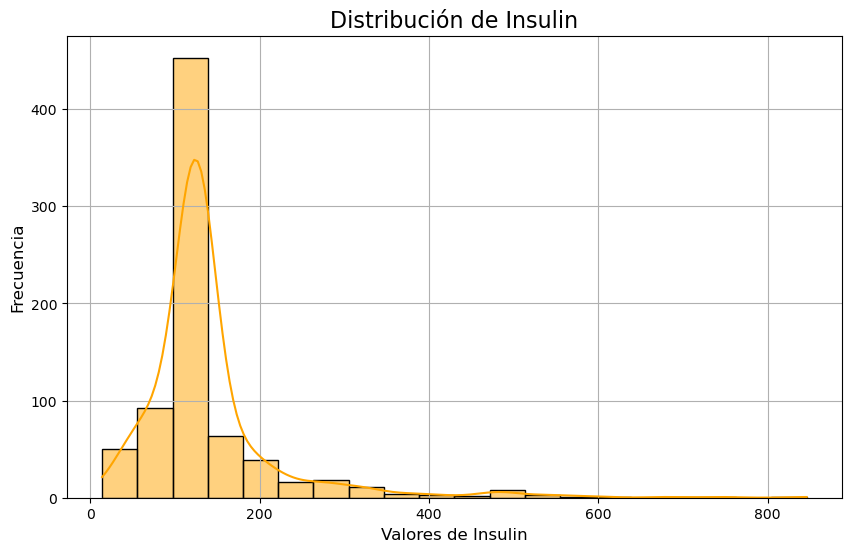

In [647]:
# dist
graficar_histograma(df,"Insulin")

El dataset quedo sin datos nulos en la variable insulina.

In [648]:
# outliers
identificar_outliers(df,'Insulin')

{'outliers':      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 3              1     89.0           66.0           23.0       94  28.1   
 4              0    137.0           40.0           35.0      168  43.1   
 6              3     78.0           50.0           32.0       88  31.0   
 8              2    197.0           70.0           45.0      543  30.5   
 13             1    189.0           60.0           23.0      846  30.1   
 ..           ...      ...            ...            ...      ...   ...   
 753            0    181.0           88.0           44.0      510  43.3   
 755            1    128.0           88.0           39.0      110  36.5   
 760            2     88.0           58.0           26.0       16  28.4   
 763           10    101.0           76.0           48.0      180  32.9   
 765            5    121.0           72.0           23.0      112  26.2   
 
      DiabetesPedigreeFunction  Age  Outcome  
 3                       0.167   21    

In [649]:
# max
df['Insulin'].max()

846

In [650]:
# min
df['Insulin'].min()

14

Los valores de insulina van en un rango de 14 a 846, siendo 846 un valor demasiado elevado y se procede a filtrar estos datos para entender su origen.

In [651]:
# insulina superior a 500
df[df['Insulin'] > 500]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197.0,70.0,45.0,543,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846,30.1,0.398,59,1
228,4,197.0,70.0,39.0,744,36.7,2.329,31,0
247,0,165.0,90.0,33.0,680,52.3,0.427,23,0
286,5,155.0,84.0,44.0,545,38.7,0.619,34,0
409,1,172.0,68.0,49.0,579,42.4,0.702,28,1
584,8,124.0,76.0,24.0,600,28.7,0.687,52,1
655,2,155.0,52.0,27.0,540,38.7,0.240,25,1
753,0,181.0,88.0,44.0,510,43.3,0.222,26,1


Se observa que en el dataset hay valores muy elevados de insulina, para identificar mejor el motivo de estos datos se filtraron aquellos en donde la valor de insulina sea superior a 500. Se visualiza que algunos de los datos de insulina superiores a 500 corresponden a personas que tienen detectada la diabetes y razón por la cual el dato puede que se trate de un valor real. Pero sin embargo, los datos de las personas que no la tienen detectada y es superior a representan datos sospechosos.

Se procede a analizar la variable BMI: Índice de masa corporal (peso en kg/(altura en m)^2)

In [652]:
# bmi
df['BMI'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

En BMI los datos nuevamente son ceros y se procede de manera similar a los casos anteriores.

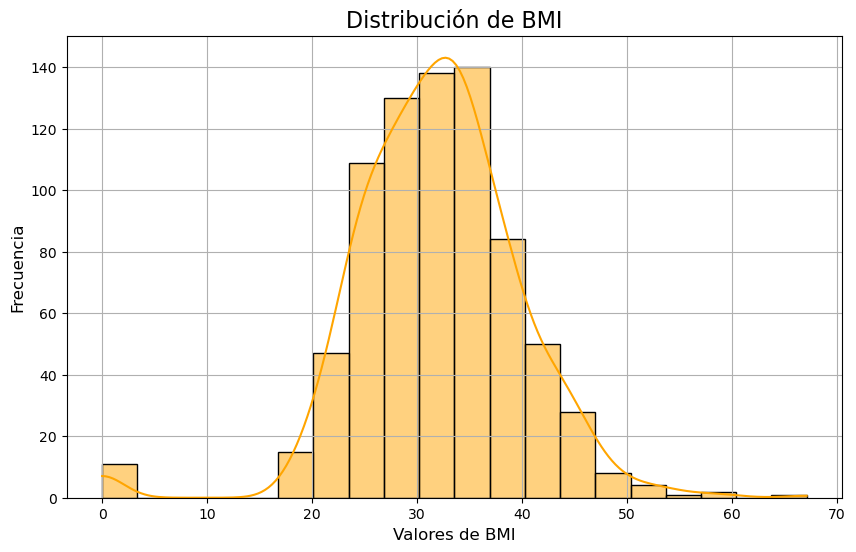

In [653]:
# dist
graficar_histograma(df,"BMI")

In [654]:
# describe
df['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [655]:
# valores nulos
df[df['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.000000,29.15342,125,0.0,0.232,54,1
49,7,105.0,72.405184,29.15342,125,0.0,0.305,24,0
60,2,84.0,72.405184,29.15342,125,0.0,0.304,21,0
81,2,74.0,72.405184,29.15342,125,0.0,0.102,22,0
145,0,102.0,75.000000,23.00000,125,0.0,0.572,21,0
371,0,118.0,64.000000,23.00000,89,0.0,1.731,21,0
426,0,94.0,72.405184,29.15342,125,0.0,0.256,25,0
494,3,80.0,72.405184,29.15342,125,0.0,0.174,22,0
522,6,114.0,72.405184,29.15342,125,0.0,0.189,26,0
684,5,136.0,82.000000,29.15342,125,0.0,0.640,69,0


Como la distribución de los datos es normal, se procede a reemplazar los 0 por la media.

In [656]:
# reemplazar datos
mean_bmi = df[df['BMI'] > 0]['BMI'].mean()

# reemplazar
df['BMI'] = df['BMI'].replace(0, mean_bmi)

In [657]:
# valores nulos
df[df['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


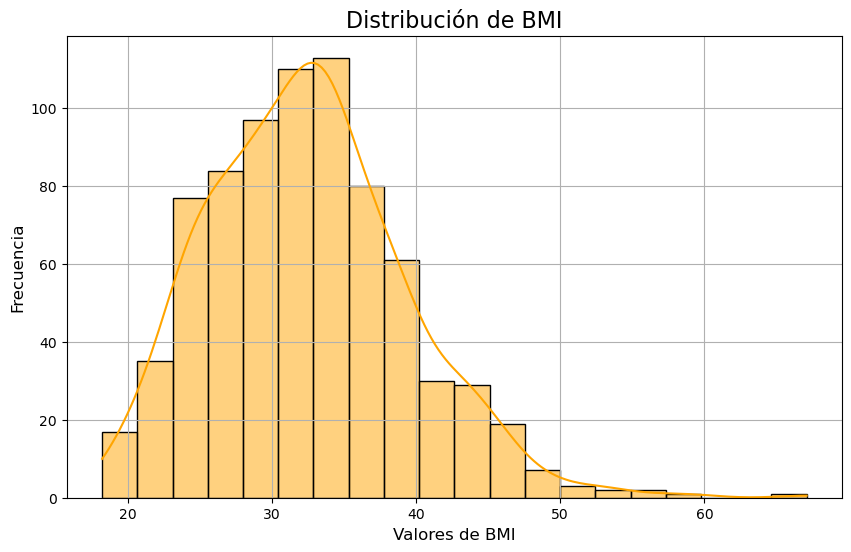

In [658]:
# dist
graficar_histograma(df,"BMI")

Al sustituir por la media, los datos de BMI quedaron ajustados.

In [659]:
# max
df['BMI'].max()

67.1

In [660]:
# BMI superior a 50
df[df['BMI'] > 50]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162.0,76.000000,56.00000,100,53.2,0.759,25,1
125,1,88.0,30.000000,42.00000,99,55.0,0.496,26,1
177,0,129.0,110.000000,46.00000,130,67.1,0.319,26,1
193,11,135.0,72.405184,29.15342,125,52.3,0.578,40,1
247,0,165.0,90.000000,33.00000,680,52.3,0.427,23,0
303,5,115.0,98.000000,29.15342,125,52.9,0.209,28,1
445,0,180.0,78.000000,63.00000,14,59.4,2.420,25,1
673,3,123.0,100.000000,35.00000,240,57.3,0.880,22,0


Se observa que el maximo valor de BMI del dataset es 67.1, siendo un valor extremadamente elevado ya que se encuentra muy fuera del rango de clasificacion de BMI. Si el BMI es superior a 40 es indicativo de obesidad morbida, sin embargo, un valor de 60 para arriba se aleja bastante del limite superior y se trata de un outlier. Como los datos tienen una distribucion normal, se reemplaza con la media.

In [661]:
# media sin extremo
mean_bmi2 = df[df['BMI'] <= 60]['BMI'].mean()

# reemplazar
df.loc[df['BMI'] > 60, 'BMI'] = mean_bmi2

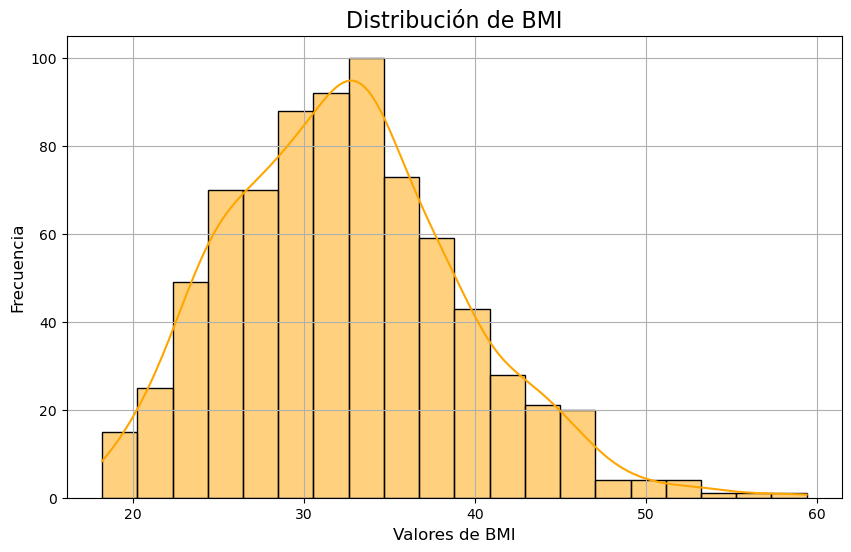

In [662]:
# dist
graficar_histograma(df,"BMI")

In [663]:
# outliers
identificar_outliers(df,"BMI")

{'outliers':      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 120            0    162.0      76.000000       56.00000      100  53.2   
 125            1     88.0      30.000000       42.00000       99  55.0   
 193           11    135.0      72.405184       29.15342      125  52.3   
 247            0    165.0      90.000000       33.00000      680  52.3   
 303            5    115.0      98.000000       29.15342      125  52.9   
 445            0    180.0      78.000000       63.00000       14  59.4   
 673            3    123.0     100.000000       35.00000      240  57.3   
 
      DiabetesPedigreeFunction  Age  Outcome  
 120                     0.759   25        1  
 125                     0.496   26        1  
 193                     0.578   40        1  
 247                     0.427   23        0  
 303                     0.209   28        1  
 445                     2.420   25        1  
 673                     0.880   22        0  ,
 'limites

Los demas valores podrian tratarse de personas con obesidad morbida como lo dice el indicador, por tanto se mantiene los valores ya que posteriormente estos datos seran utilizados en un modelo de machine learning y esa información podria será útil para el modelo. 

In [664]:
# diabetes function
df['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

Se procede a analizar la variable DiabetesPedigreeFunction: una función que puntúa la probabilidad de diabetes según los antecedentes familiares, con un rango realista de 0,08 a 2,42

In [665]:
# df
df['DiabetesPedigreeFunction'].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [666]:
# max
df['DiabetesPedigreeFunction'].max()

2.42

In [667]:
# min
df['DiabetesPedigreeFunction'].min()

0.078

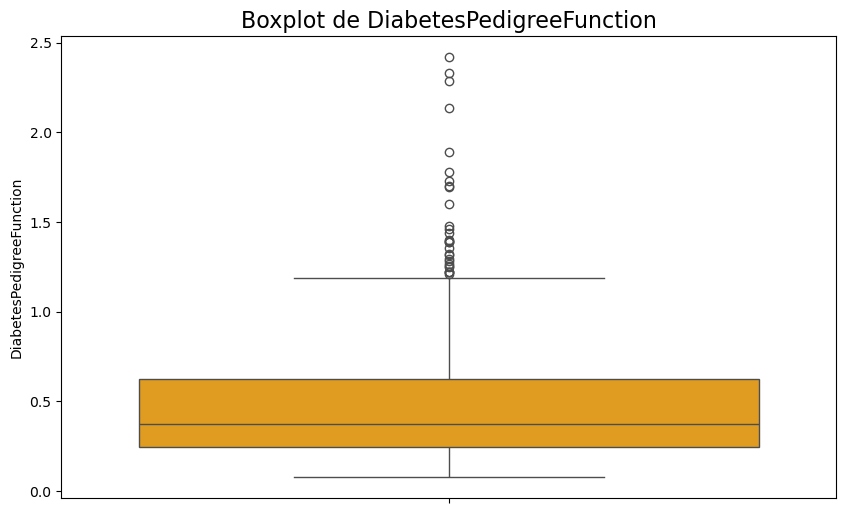

In [668]:
# boxplot
graficar_boxplot(df,'DiabetesPedigreeFunction')

Como se observan outliers en la columna de DiabetesPedigreeFunction, a continuación se filtran los resultados para entender la naturaleza de estos outliers.

In [669]:
# function superior a 1.5
df[df['DiabetesPedigreeFunction'] > 1.5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.00000,168,43.100000,2.288,33,1
45,0,180.0,66.0,39.00000,125,42.000000,1.893,25,1
58,0,146.0,82.0,29.15342,125,40.500000,1.781,44,0
228,4,197.0,70.0,39.00000,744,36.700000,2.329,31,0
370,3,173.0,82.0,48.00000,465,38.400000,2.137,25,1
371,0,118.0,64.0,23.00000,89,32.457464,1.731,21,0
395,2,127.0,58.0,24.00000,275,27.700000,1.600,25,0
445,0,180.0,78.0,63.00000,14,59.400000,2.420,25,1
593,2,82.0,52.0,22.00000,115,28.500000,1.699,25,0
621,2,92.0,76.0,20.00000,125,24.200000,1.698,28,0


Los valores superiores a 1.5 en DiabetesPedigreeFunction fueron filtrados. Se visualiza que en realidad se trata de valores que pueden ser posibles y se encuentran dentro del rango. En particular, los valores superiores a 2 sugieren un alto riesgo de padecer diabetes debido al historial genetico de estas pacientes, por tanto a pesar de ser elevados, son posibles.

Se procede a analizar la variable Age: edades de las pacientes

In [670]:
# edad
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

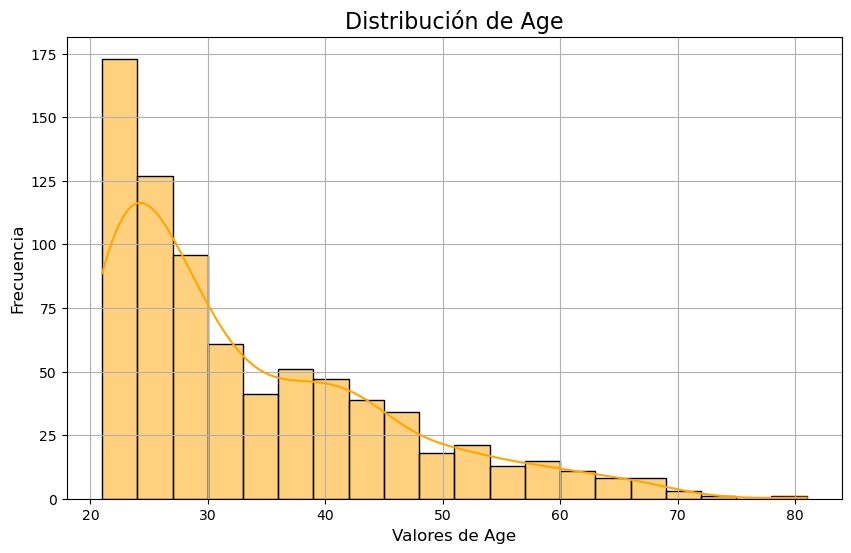

In [671]:
# dist
graficar_histograma(df,"Age")

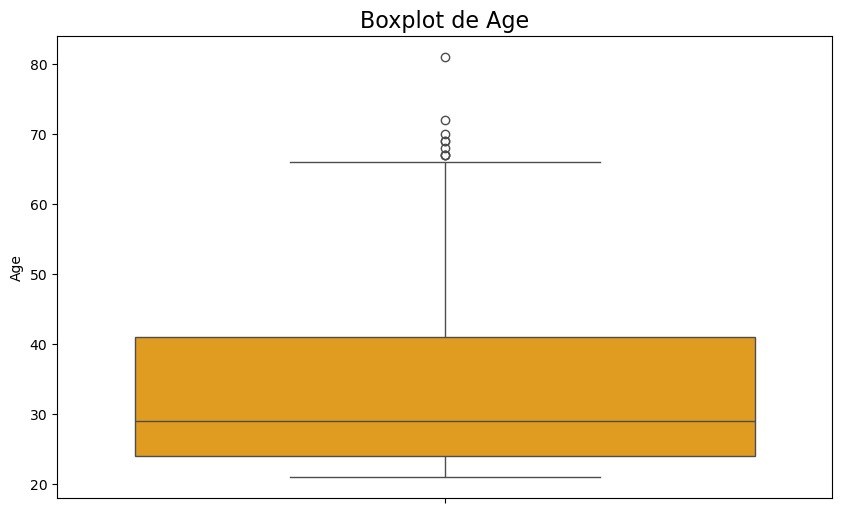

In [672]:
# boxplot
graficar_boxplot(df,"Age")

In [673]:
# 70 
df[df['Age'] > 70]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
453,2,119.0,72.405184,29.15342,125,19.6,0.832,72,0
459,9,134.0,74.000000,33.00000,60,25.9,0.460,81,0


Los datos de edad se encuentran en un rango razonable. A pesar de los outliers que se visualizan en el boxplot, al inspeccionar los datos, se concluye que son datos posibles, en particular, la persona con BMI 19.6 si tiene un valor un bajo para la edad pero no obstante es un dato posible.

A continuación se procede a realizar un análisis exploratorio de los datos corregidos y limpios.

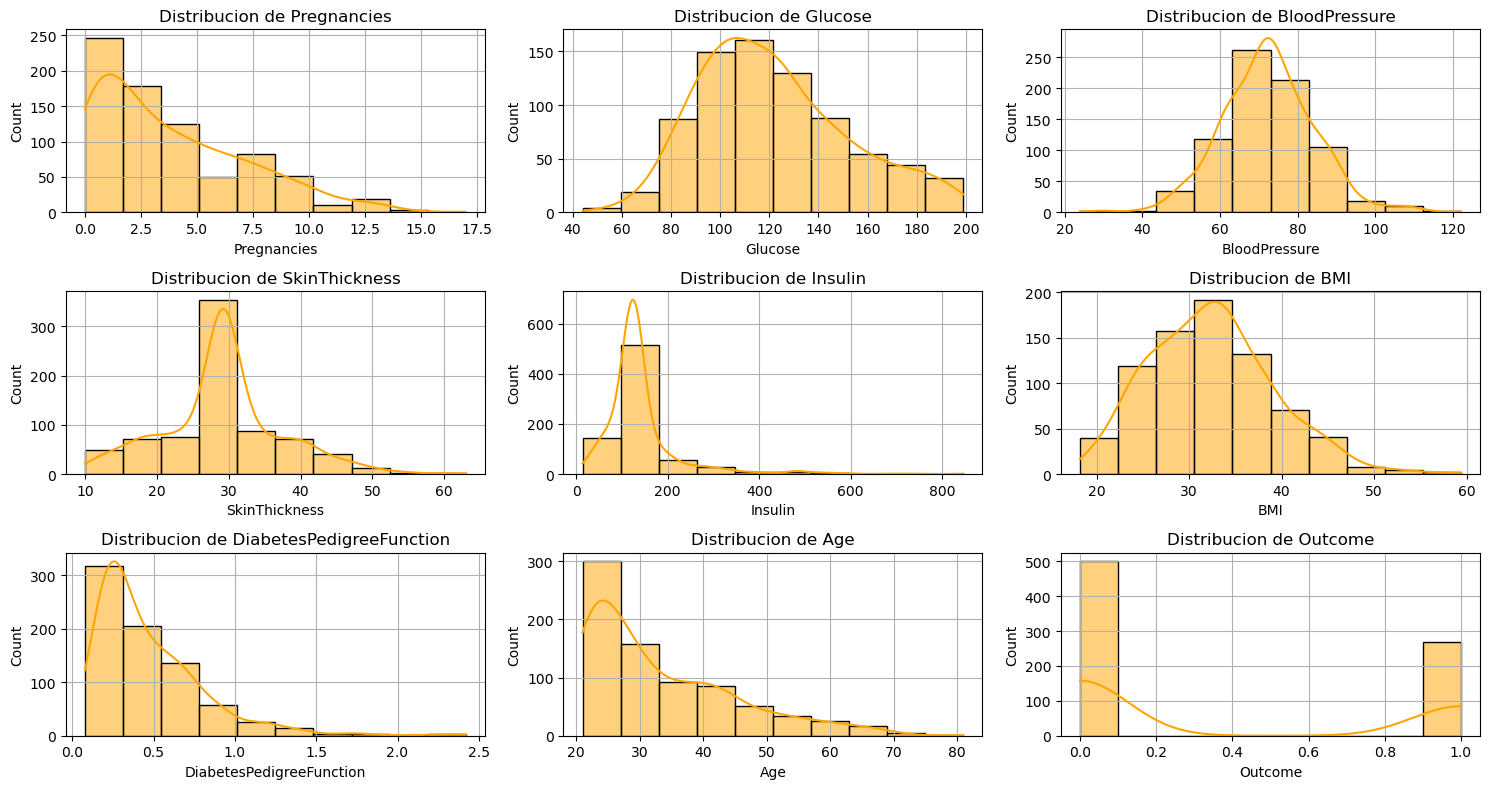

In [674]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 3
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# distribucion de los datos
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.histplot(df[col], kde=True, color="orange", bins=10)  
    plt.title(f"Distribucion de {col}")
    plt.tight_layout()
    plt.grid()

plt.show()

La distribución de los datos fue corregida y ya no visualizan valores imposibles en las variables.

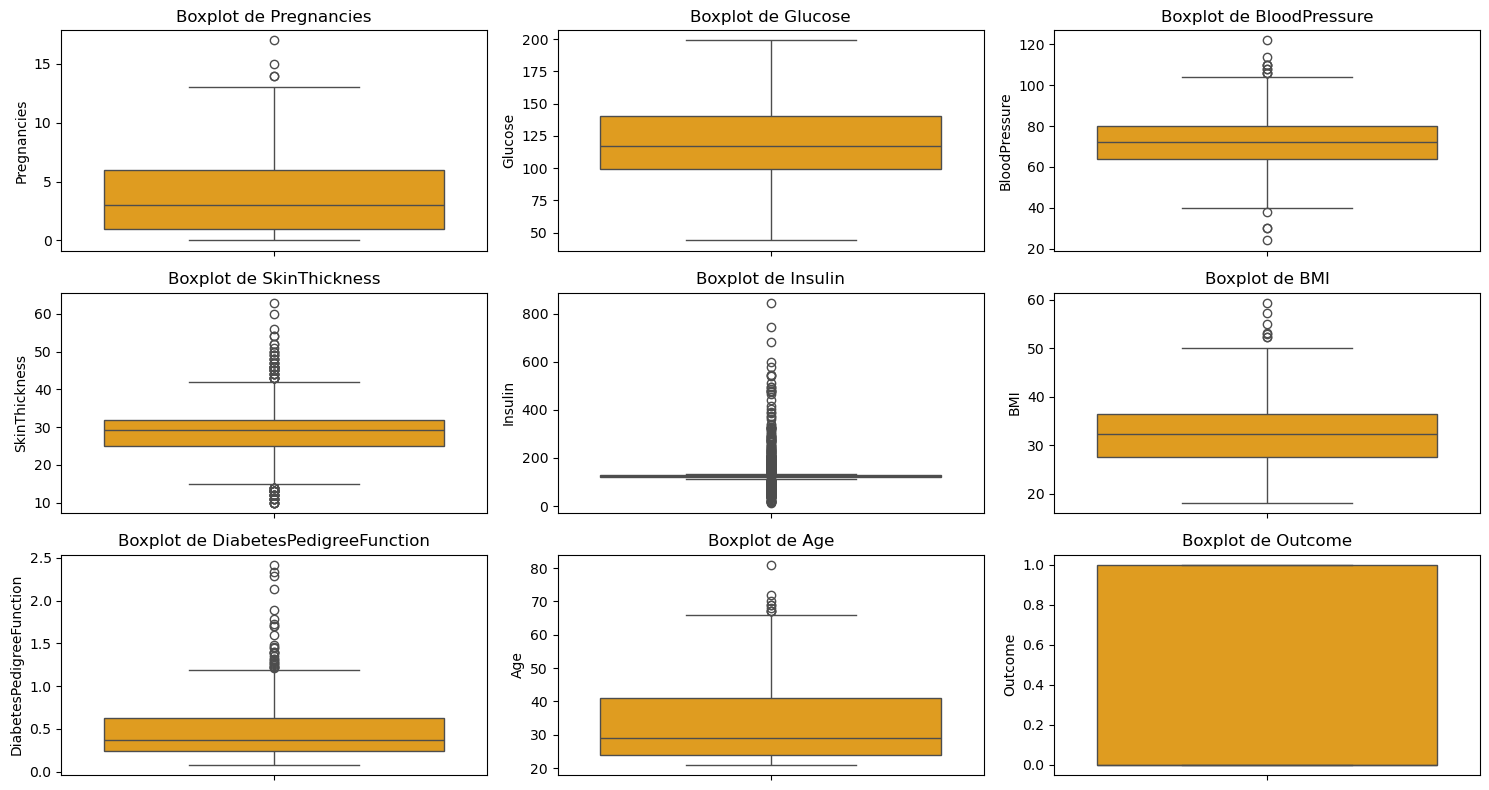

In [675]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 3
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# crear boxplots 
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.boxplot(y=df[col], color="orange")
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

Se eliminaron los outliers más evidentes, sin embargo algunos de ellos se optó por mantenerlos ya que a pesar de ser extremos si representan valores posibles en el contexto de las pacientes y proporcionarán un valor predictivo al modelo.

In [676]:
# df
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,125,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1


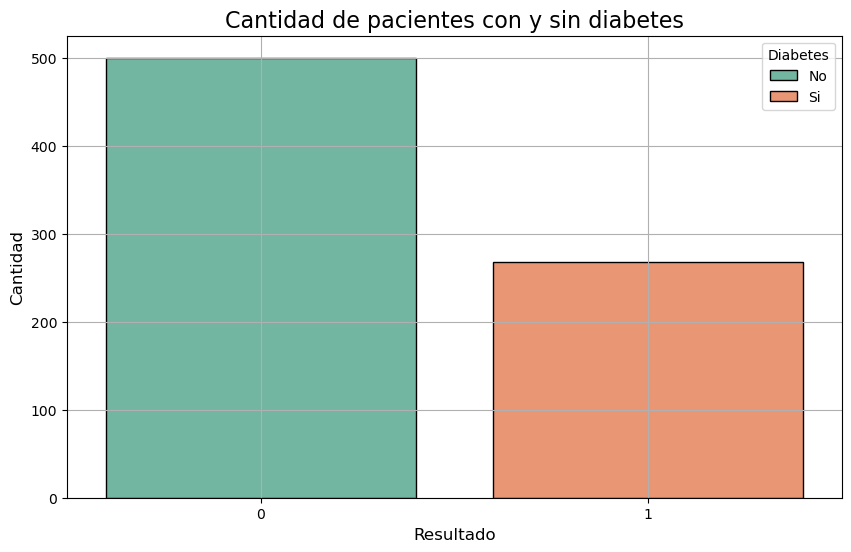

In [677]:
# grafico
plt.figure(figsize=(10, 6))

# boxplot
sns.countplot(x='Outcome', data=df, palette='Set2', hue='Outcome',legend=False, edgecolor='black')
plt.title('Cantidad de pacientes con y sin diabetes', fontsize=16)
plt.xlabel('Resultado', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.legend(title='Diabetes', labels=['No', 'Si'])
plt.grid()

# gráfico
plt.show()

En el gráfico se observa un resumen del dataset en cuanto a la cantidad de personas con diabetes diagnosticada. Hay una mayor cantidad de personas sin el diagnóstico de diabetes.

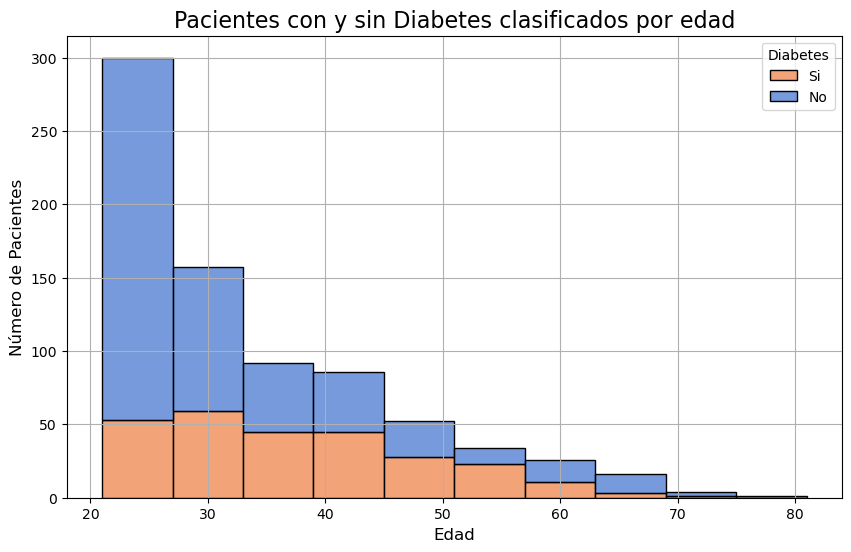

In [678]:
# grafico
plt.figure(figsize=(10, 6))

# hist
sns.histplot(data=df, x='Age', hue='Outcome', multiple='stack', bins=10, palette='muted')
plt.title('Pacientes con y sin Diabetes clasificados por edad', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)
plt.legend(title='Diabetes', labels=['Si', 'No'])
plt.grid()

# gráfico
plt.show()


Al agrupar los datos por edad, se observa que la mayoria de las pacientes que tienen diabetes se encuentran en los 20 y 30 años.

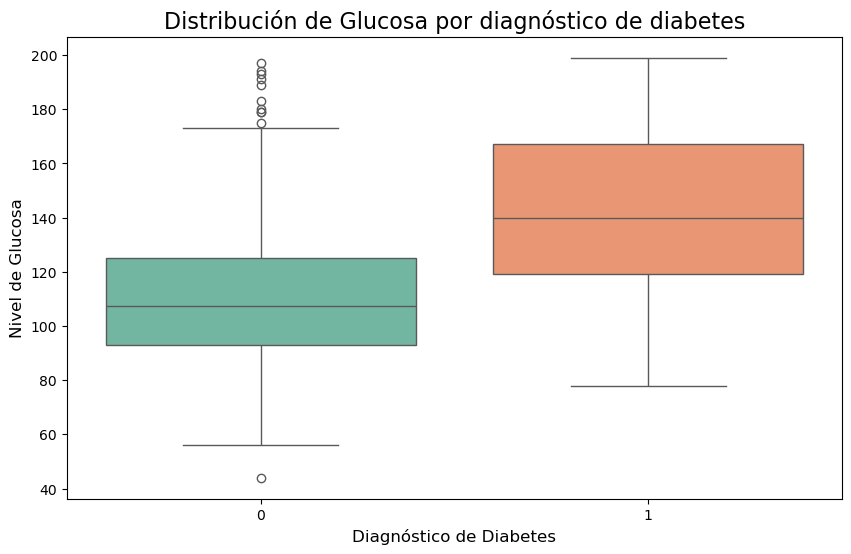

In [679]:
# grafico
plt.figure(figsize=(10, 6))

# boxplot
sns.boxplot(data=df, x='Outcome', y='Glucose', palette='Set2', hue='Outcome',legend=False)
plt.title('Distribución de Glucosa por diagnóstico de diabetes', fontsize=16)
plt.xlabel('Diagnóstico de Diabetes', fontsize=12)
plt.ylabel('Nivel de Glucosa', fontsize=12)

# grafico
plt.show()  


La distribución de los valores de glucosa para las pacientes con diabetes es superior a las que no posee, como es de esperarse. Las pacientes con diabetes tienen en torno a 150 de glucosa mientras que quienes no tienen diagnosticado, lo tienen en torno a los 110.

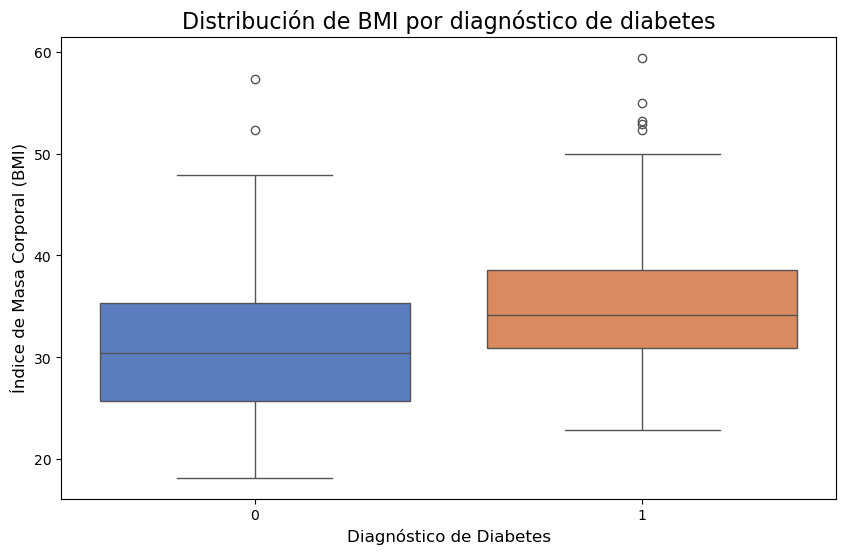

In [680]:
# gráfico
plt.figure(figsize=(10, 6))

# Graficar el boxplot de BMI por diagnóstico de diabetes
sns.boxplot(data=df, x='Outcome', y='BMI', palette='muted',hue='Outcome',legend=False)
plt.title('Distribución de BMI por diagnóstico de diabetes', fontsize=16)
plt.xlabel('Diagnóstico de Diabetes', fontsize=12)
plt.ylabel('Índice de Masa Corporal (BMI)', fontsize=12)

# grafico
plt.show()

En este gráfico se visuzalia que las personas con diagnóstico de diabetes positivo tienden a tener un mayor índice de masa corporal.

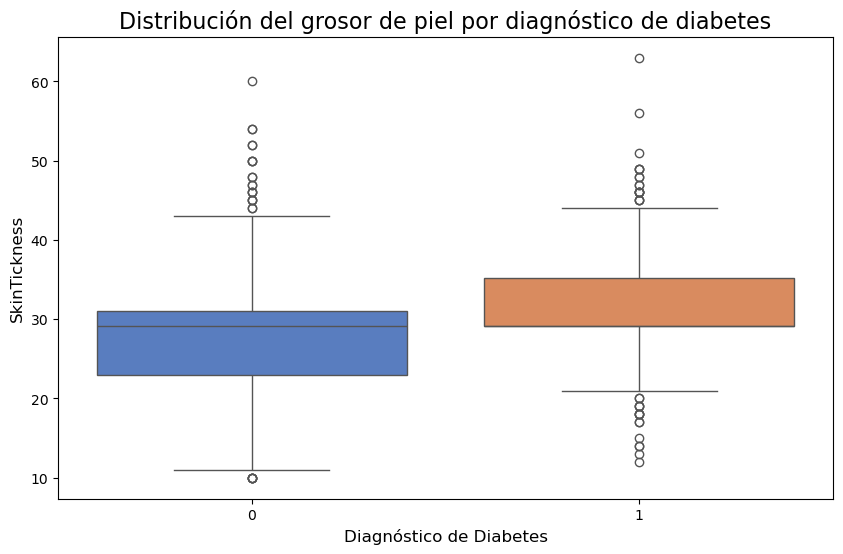

In [681]:
# gráfico
plt.figure(figsize=(10, 6))

# Graficar el boxplot de BMI por diagnóstico de diabetes
sns.boxplot(data=df, x='Outcome', y='SkinThickness', palette='muted',hue='Outcome',legend=False)
plt.title('Distribución del grosor de piel por diagnóstico de diabetes', fontsize=16)
plt.xlabel('Diagnóstico de Diabetes', fontsize=12)
plt.ylabel('SkinTickness', fontsize=12)

# grafico
plt.show()

Igualmente, las personas con diagnóstico de diabetes también tienden a tener un grosor de piel mayor en comparación a quienes no poseen la enfermedad.

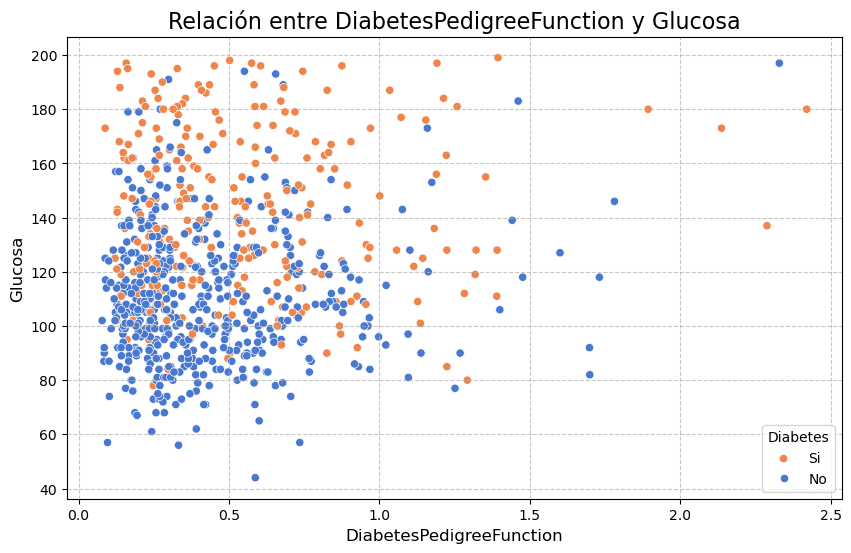

In [686]:
# gráfico
plt.figure(figsize=(10, 6))

# catter
sns.scatterplot(data=df, x='DiabetesPedigreeFunction', y='Glucose', hue='Outcome', palette='muted')
plt.title('Relación entre DiabetesPedigreeFunction y Glucosa', fontsize=16)
plt.xlabel('DiabetesPedigreeFunction', fontsize=12)
plt.ylabel('Glucosa', fontsize=12)
plt.legend(title='Diabetes', labels=['Si', 'No'])
plt.grid(linestyle='--', alpha=0.7)

# gráfico
plt.show()


El gráfico de dispersión entre los valores de la función pedigree de diabetes y las mediciones de glucosa sugiere que hay correlación entre ambas variables. En particular, personas que tienen la diabetes diagnosticada tienen valores de entre 0.3 a 1 de la función de pedigree de diabtetes y esto se relaciona con valores de glucosa elevados. De esto último se puede concluir que la diabetes en estas personas se debe a una combinación de causas genéticas y la presencia de glucosa en sangre. 

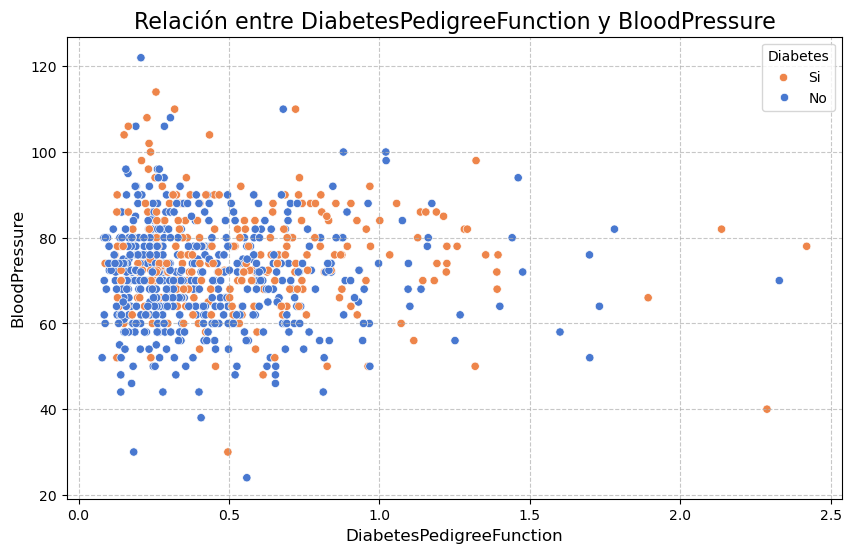

In [687]:
# gráfico
plt.figure(figsize=(10, 6))

# Graficar el scatter plot
sns.scatterplot(data=df, x='DiabetesPedigreeFunction', y='BloodPressure', hue='Outcome', palette='muted')
plt.title('Relación entre DiabetesPedigreeFunction y BloodPressure', fontsize=16)
plt.xlabel('DiabetesPedigreeFunction', fontsize=12)
plt.ylabel('BloodPressure', fontsize=12)
plt.legend(title='Diabetes', labels=['Si', 'No'])
plt.grid(linestyle='--', alpha=0.7)

# gráfico
plt.show()


El gráfico muestra la correlación entre la presión en sangre y la función pedigree de diabetes. 

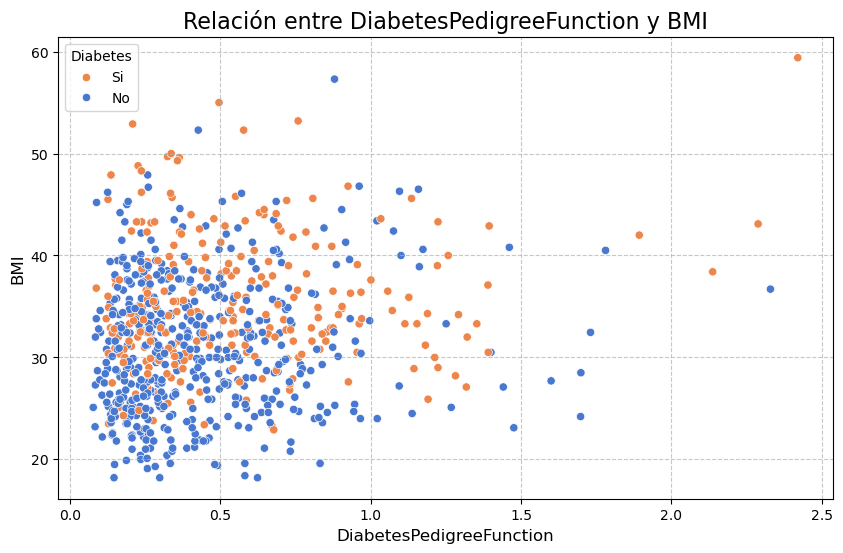

In [688]:
# gráfico
plt.figure(figsize=(10, 6))

# scatter plot
sns.scatterplot(data=df, x='DiabetesPedigreeFunction', y='BMI', hue='Outcome', palette='muted')
plt.title('Relación entre DiabetesPedigreeFunction y BMI', fontsize=16)
plt.xlabel('DiabetesPedigreeFunction', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.legend(title='Diabetes', labels=['Si', 'No'])
plt.grid(linestyle='--', alpha=0.7)

# gráfico
plt.show()

El gráfico muestra la correlación entre el índice de masa corporal con la función pedigree de diabetes. Esta correlación sugiere que las personas que tienen diagnosticada diabetes pero tienen un BMI bajo, su diagnostico se debe causas hereditarias.

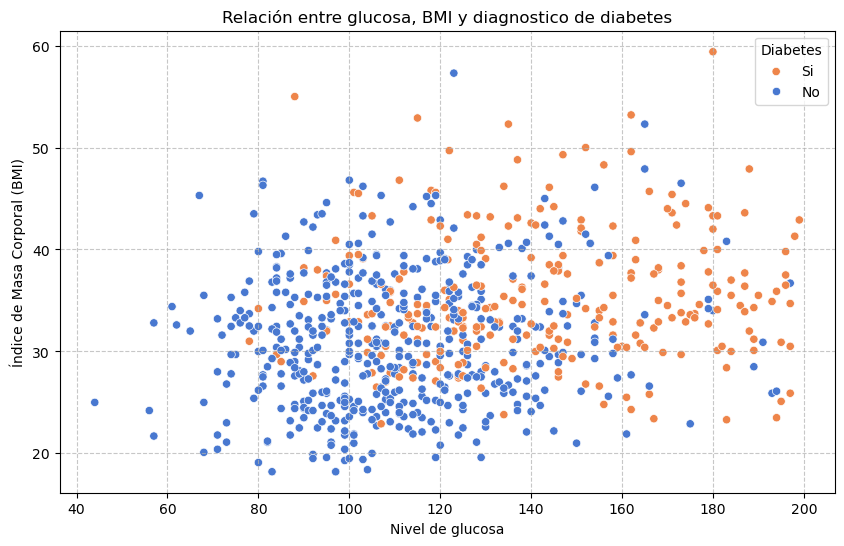

In [689]:
# gráfico
plt.figure(figsize=(10, 6))

# scatter plot
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Outcome", palette="muted")
plt.title("Relación entre glucosa, BMI y diagnostico de diabetes")
plt.xlabel("Nivel de glucosa")
plt.ylabel("Índice de Masa Corporal (BMI)")
plt.legend(title='Diabetes', labels=['Si', 'No'])
plt.grid(linestyle='--', alpha=0.7)

# grafico
plt.show()

El gráfico relaciona el indice de masa corporal con el nivel de glucosa y el diagnostico de diabetes. Este gráfico muestra que hay una relación entre estas variables, y es que las personas con niveles de glucosa elevados y asi también con alto índice de masa corporal, son más propensas a padecer la enfermedad.

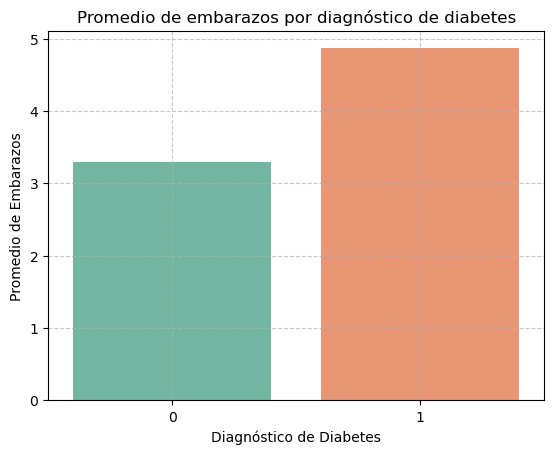

In [695]:
# embarazos agrupados por diagnostico
pregnancies_avg = df.groupby("Outcome")["Pregnancies"].mean().reset_index()

# barplot
sns.barplot(data=pregnancies_avg, x="Outcome", y="Pregnancies", palette="Set2", hue='Outcome', legend=False)
plt.title("Promedio de embarazos por diagnóstico de diabetes")
plt.xlabel("Diagnóstico de Diabetes")
plt.ylabel("Promedio de Embarazos")
plt.grid(True, linestyle="--", alpha=0.7)

# grafico
plt.show()

El grafico muestra el promedio de embarazos clasificados por diagnostico. Se observa que la mayoria de las pacientes que tienen diabetes, tienen embarazos mas frecuentes y en promedio mas de 4 en comparación a las pacientes que no tienen diabetes.

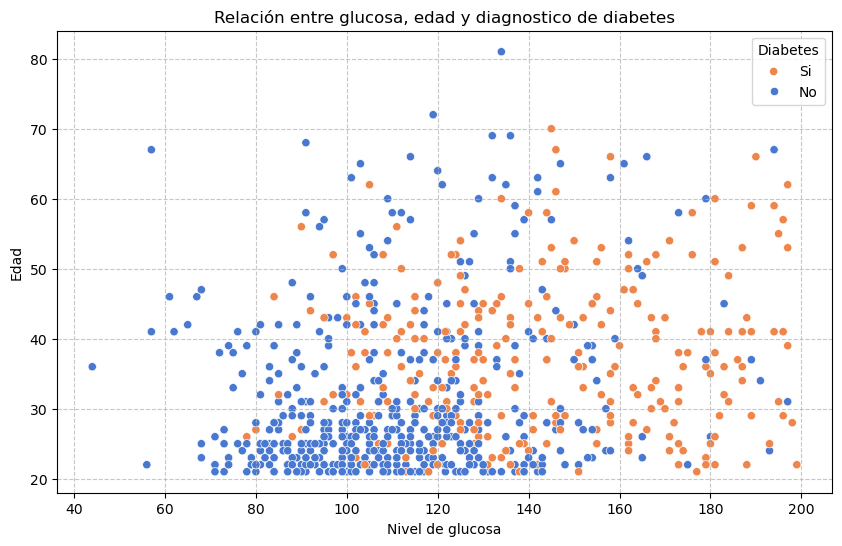

In [701]:
# gráfico
plt.figure(figsize=(10, 6))

# scatter plot
sns.scatterplot(data=df, x="Glucose", y="Age", hue="Outcome", palette="muted")
plt.title("Relación entre glucosa, edad y diagnostico de diabetes")
plt.xlabel("Nivel de glucosa")
plt.ylabel("Edad")
plt.legend(title='Diabetes', labels=['Si', 'No'])
plt.grid(linestyle='--', alpha=0.7)

# grafico
plt.show()

En el grafico se observa la relacion entre la edad, la cantidad de glucosa en sangre y el diagnostico de diabetes. Nuevamente se observa que las personas que tienen altos niveles de glucosa, tienen la diabetes diagnosticada y las edades son menores, es decir, a partir de los 25 en adelante se observa que padecen la enfemedad.

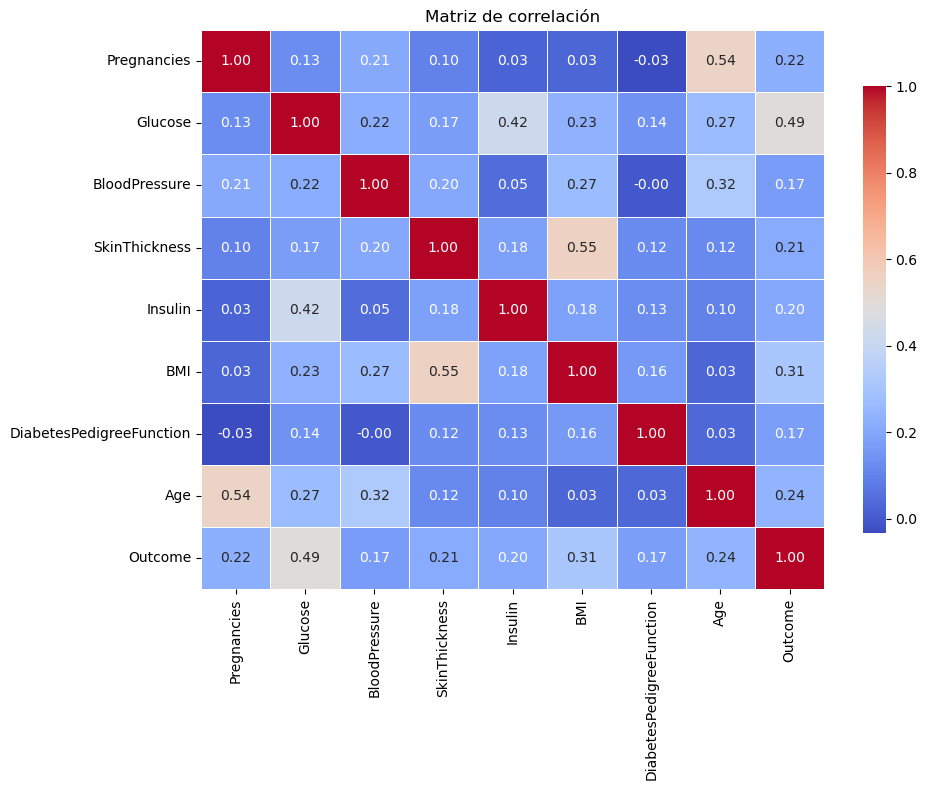

In [703]:
# variables numéricas
numerical_columns = df.select_dtypes(include=['int64','float64'])

# matriz de correlación
correlation_matrix = numerical_columns.corr()

# mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='white', cbar_kws={"shrink": .8})
plt.title('Matriz de correlación')

# grafico
plt.tight_layout()
plt.show()

Se observan correlaciones entre las variables, sin embargo, las mismas no son correlaciones muy fuertes, en particular esto sugiere que las relaciones entre las variables no se comportan de manera lineal. Una de las correlaciones a destacar es la de la glucosa con el outcome, ya que se ve que hay relación más importante que con las otras.

### **3. Preprocesamiento de los datos**

El objetivo de aplicar distintos modelos a este set de datos es el de predecir si la persona es propensa a tener diabetes o no, basadas en los datos médicos que proporciono.

Se realiza el preprocesamiento de los datos para luego ser utilizados en modelos.

In [704]:
#df
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [705]:
# df
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,125,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1


Se eligen como variable target a Outcome y las demas columnas seran utlilizadas como predictoras.

In [706]:
# variables categoricas y target
x = df.drop(columns=['Outcome'])  
y = df[['Outcome']]

A pesar de que los datos del dataset son todos numéricos, igualmente se especifica la extraccion de columnas categóricas a modo de generalizar el código.

In [708]:
# extraer columnas
numerical_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes(include=['object']).columns

# verificar
print("Features numericas: ", numerical_features)
print("Features categoricas: ", categorical_features)

Features numericas:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
Features categoricas:  Index([], dtype='object')


A pesar de que el dataset no contiene datos faltantes, igualmente se especifica en el pipeline un método de imputación a modo de que el código o el procedimiento sea escalable. Asi mismo, se opta por el SimpleImputer como método de imputación. 

Por otro lado, como las mayoría de los datos tienen distribución normal, se opta por el standardscaler para realizar los escalamientos.

In [709]:
# transformadores para cada subconjunto de columnas
# numerico
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# categorico
categoric_transformer =  Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

Se crea el columnTransformer para aplicarlo a los datos.

In [710]:
# crear columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),  
        ('cat', categoric_transformer, categorical_features)  
    ]
)

Se separan los datos en 70% de entrenamiento y 30% para test.

In [711]:
# split del dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [712]:
# verificacion 
print("Variables predictoras dimensiones en train" , x_train.shape)
print("Variable target dimensiones en train" , y_train.shape)

print("Variables predictoras dimensiones en test" , x_test.shape)
print("Variable target dimensiones en test" , y_test.shape)

Variables predictoras dimensiones en train (537, 8)
Variable target dimensiones en train (537, 1)
Variables predictoras dimensiones en test (231, 8)
Variable target dimensiones en test (231, 1)


### **4. Aplicación de modelos**

### **Modelo Random Forest Classifier**

Se aplica el modelo random forest classifier para el diagnostico de diabetes. Los parametros seleccionados son: como criterio se seleccionó "gini", el número de estimadores será 100 y la profundidad máxima de cada árbol será 15.

In [742]:
# pipeline 
model_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', RandomForestClassifier(
    criterion="gini",
    n_estimators=100,
    max_depth=15,
    random_state=42
)
)])

In [743]:
# ajustar a los datos 
model_forest.fit(x_train, y_train.values.flatten())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=15, random_state=42))])

In [744]:
# realizar predicciones
y_pred = model_forest.predict(x_test)

In [745]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.7792207792207793
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       151
           1       0.67      0.70      0.69        80

    accuracy                           0.78       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



In [746]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[124  27]
 [ 24  56]]


In [747]:
# funcion para graficar la matriz de confusion
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')
    plt.show()

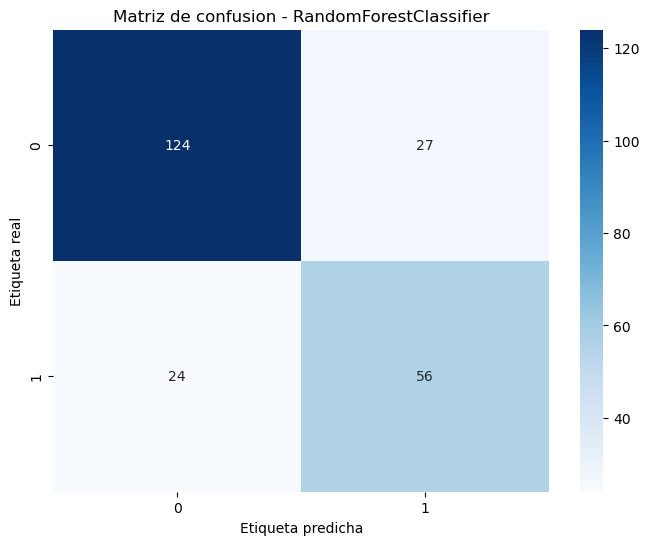

In [748]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - RandomForestClassifier")

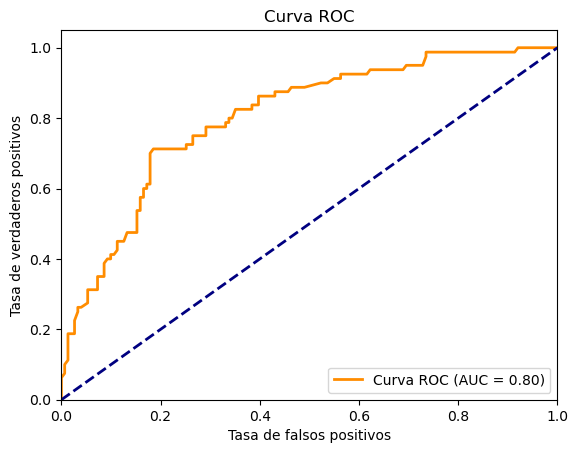

In [749]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, model_forest.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Los resultados utilizando random forest classifier con los parámetros mencionados anteriormente, son buenos. El modelo realiza buenas predicciones del diagnóstico de diabetes. En particular, tiene una exactitud de 0.77. La matriz de confusión muestra que realiza buenas clasificaciones, ya que un total de 180 valores fueron predichos correctamente y solo un 51 valores restantes fueron etiquetados erroneamente. Por otro lado, la curva roc arroja un valor de 0.80, lo cual es un desempeño bastante bueno.

### **Modelo XGBoost**

Se aplica el modelo xgboost classifier para el diagnostico de diabetes. La métrica de evaluación seleccionada es el auc, la profundidad máxima será de 4, los estimadores serán 200 y la tasa de aprendizaje será 0.1.

In [ ]:
# pipeline 
model_xgboost = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', xgb.XGBClassifier(eval_metric="auc",           
    max_depth=4,                 
    n_estimators=200,            
    learning_rate=0.1) 
)])

In [800]:
# ajustar a los datos
model_xgboost.fit(x_train, y_train.values.flatten())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [801]:
# realizar predicciones
y_pred = model_xgboost.predict(x_test)

In [802]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.7489177489177489
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       151
           1       0.62      0.70      0.66        80

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.75      0.75       231



In [803]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[117  34]
 [ 24  56]]


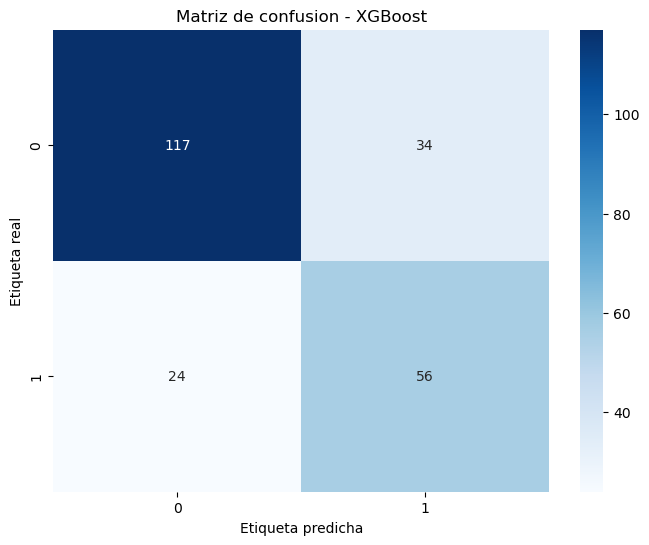

In [805]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - XGBoost")

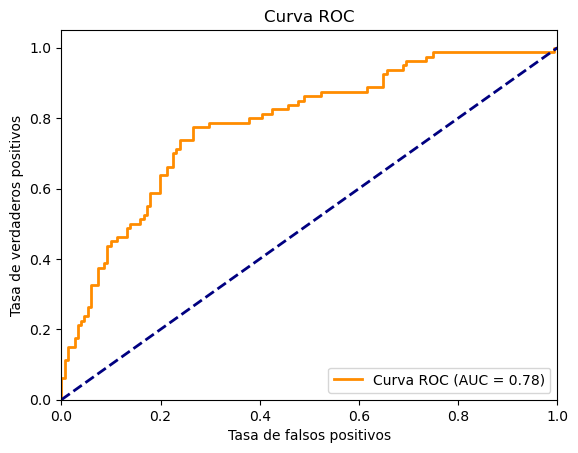

In [806]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, model_xgboost.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

El modelo XGBoost tiene un rendimiento menor al de Random Forest Classifier, con una exactitud de 0.73. Dentro de todo, realiza buenas predicciones, ya que la matriz de confusión muestra que 173 valores fueron etiquetados correctamente. En cuanto a la curva roc muestra un 78% de probablidades de predecir correctamente, 2% menos que el modelo de Random Forest Classifier, que igualmente es una una aproximación.

A continuación, se busca optimizar el modelo XGBoost usando GridSearchCV

In [ ]:
# hiperparametros a probar
param_grid = {
    "classifier__learning_rate": [0.01, 0.05, 0.1],    
    "classifier__max_depth": [3, 4, 5],                  
    "classifier__n_estimators": [100, 200, 300],        
    "classifier__subsample": [0.8, 1.0],               
    "classifier__colsample_bytree": [0.8, 1.0]          
}

In [811]:
# GridSearchCV
grid_search = GridSearchCV(
    model_xgboost, 
    param_grid,  
    cv=5,  
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1  
)

In [812]:
# buscar en train
grid_search.fit(x_train, y_train.values.flatten())

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=200,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.8, 1.0],
                         'classifier__learning_rate': [0.01, 0.05, 0.1],
                         'classifier__max_depth': [3, 4, 5],
                         'classifier__n_estimators': [100, 200, 300],
                         'classifier__subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [813]:
# resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor R² en validación cruzada:", grid_search.best_score_)

Mejores parámetros: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Mejor R² en validación cruzada: 0.7764624437521632


In [814]:
# modelo ajustado
best_xgboost_model = grid_search.best_estimator_

In [815]:
# realizar predicciones
y_pred = best_xgboost_model.predict(x_test)

In [816]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.7662337662337663
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       151
           1       0.65      0.69      0.67        80

    accuracy                           0.77       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.77      0.77      0.77       231



In [817]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[122  29]
 [ 25  55]]


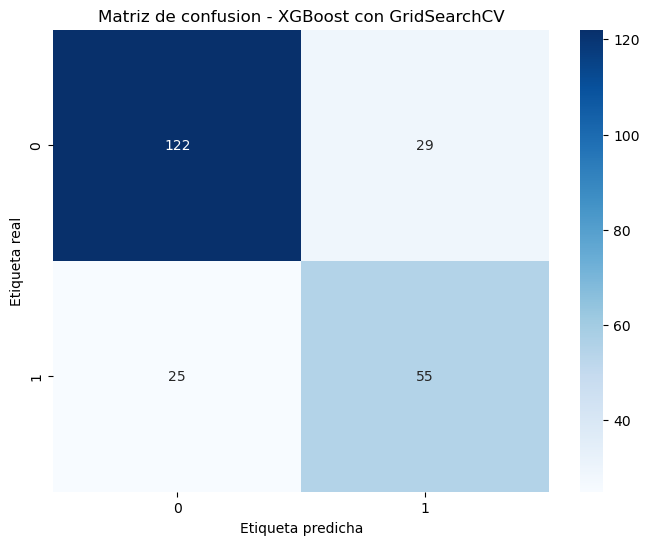

In [818]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - XGBoost con GridSearchCV")

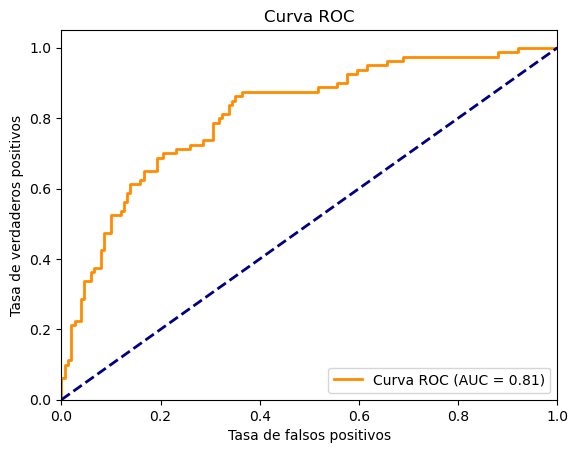

In [819]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, best_xgboost_model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Aplicando GridSearchCV, el modelo de XGBoost mejoro levemente. En particular, la exactitud aumento a 0.76 y la matriz de confusión muestra un incremento en la tasa de valores etiquetados correctamente, que ahora sube a 177 etiquetas predichas. Además, luego de aplicar GridSearchCV, el modelo aumento en 81% de probabilidades para predecir correctamente. 

### **Conclusiones**

Se aplicaron modelos de machine learning para predecir el diagnóstico de diabetes en mujeres en base a sus datos médicos registrados, tales como su edad, el número de embarazos, su índice de masa corporal, la glucosa y la insulina, entre otros factores. 

Inicialmente se realizó un análisis exploratorio de los datos, en el cual se interpretaron los datos del dataset y se buscó outliers. Muchos datos del dataset contenían valores de 0 en variables que eran completamente imposible que tengan este valor. Se utilizaron técnica de imputación para los outliers, de acuerdo la distribución de los datos y considerando que posteriormente serían utilizados en modelos de machine learning. 

Finalmente, se aplicaron los modelos de Random Forest Classifier y XGBoost para la predicción del diagnóstico de diabetes. En particular, el modelo Random Forest Classifier tuvo buen performance, ya que tuvo una exactitud de aproximadamente 0.78, y la cantidad de etiquetas correctamente predichas es de 180, y con 80% de probabilidades de predecir los valores correctamente. 

Por otro lado, el modelo XGBoost inicialamente presentó un rendimiento inferior al Random Forest Classifier, que luego fue mejorado aplicando GridSearchCV. Al aplicar esta técnica, el perfomance del modelo aumentó, alcanzando una exactitud de 0.76, prediciendo 177 diagnósticos correctamente, así mismo la probabilidad aumentó a 81%, superando levemente a Random Forest Classifier en términos de probabilidad. 

Ambos modelos pueden continuar siendo mejorados aplicando mejores hiperparámetros. 

